In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR

In [2]:
results = pd.read_csv('./results.csv')
comments = pd.read_csv('./comments.csv')
COLS = [col for col in results.columns if col != 'College']

## Raw Data

/var/folders/p0/n3xwhk1s2hxd2pgk0k7wjbcm0000gn/T/ipykernel_94063/274452910.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i//3, i%3].set_xticklabels(colleges, rotation=90)
/var/folders/p0/n3xwhk1s2hxd2pgk0k7wjbcm0000gn/T/ipykernel_94063/274452910.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i//3, i%3].set_xticklabels(colleges, rotation=90)
/var/folders/p0/n3xwhk1s2hxd2pgk0k7wjbcm0000gn/T/ipykernel_94063/274452910.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i//3, i%3].set_xticklabels(colleges, rotation=90)
/var/folders/p0/n3xwhk1s2hxd2pgk0k7wjbcm0000gn/T/ipykernel_94063/274452910.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

IndexError: index 3 is out of bounds for axis 0 with size 3

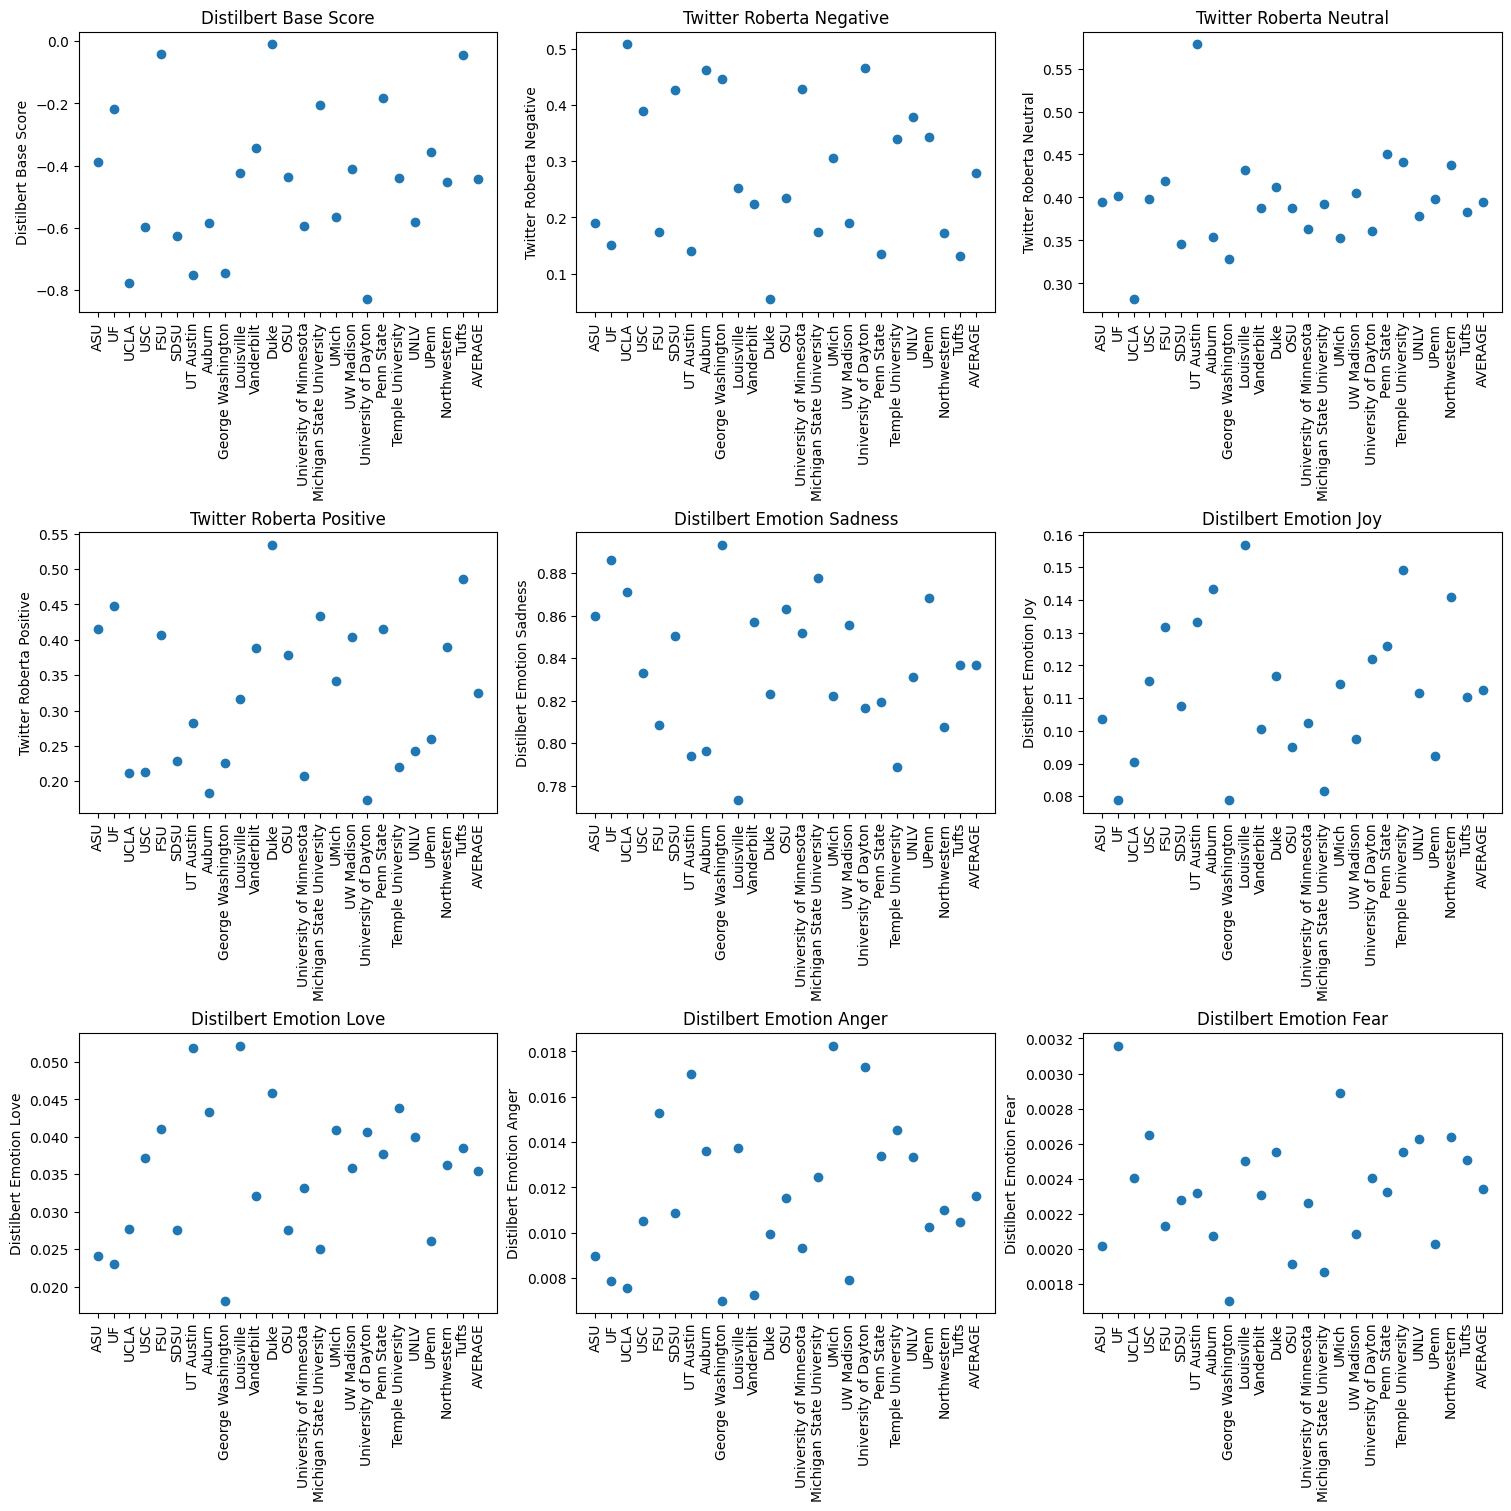

In [3]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15), constrained_layout=True)
for i, col in enumerate(COLS):
    ax[i//3, i%3].set_title(col)
    colleges = list(results['College'])
    values = list(results[col])
    ax[i//3, i%3].scatter(colleges, values)
    ax[i//3, i%3].set_xticklabels(colleges, rotation=90)
    ax[i//3, i%3].set_ylabel(col)
#plt.tight_layout()
plt.show()

## Geography

In [ ]:
CLUSTERS = {
    'Southwest': ['ASU', 'UCLA', 'USC', 'SDSU', 'UNLV'],
    'Southeast': ['UF', 'FSU', 'UT Austin', 'Auburn'],
    'Northeast': ['UPenn', 'Temple University', 'Tufts'],
    'Middle Atlantic': ['Louisville', 'George Washington', 'Vanderbilt', 'Duke'],
    'Midwest': ['University of Minnesota', 'Michigan State University', 'UMich', 'UW Madison', 'University of Dayton', 'Penn State', 'Northwestern', 'OSU']
}

In [ ]:
cluster_results = dict()
for cluster in CLUSTERS:
    cluster_total_comments = 0
    for college in CLUSTERS[cluster]:
        college_comments = comments[comments['College'] == college]
        cluster_total_comments += len(college_comments)
    cluster_results[cluster] = {
        'mean': 0,
        'values': [],
        'std': 0
    }
    for college in CLUSTERS[cluster]:
        row = results[results['College'] == college]  
        college_comments = len(comments[comments['College'] == college])
        cluster_results[cluster]['values'].append(float(row[COLS[0]]) * (college_comments/cluster_total_comments))
    cluster_results[cluster]['mean'] = np.mean(cluster_results[cluster]['values'])
    cluster_results[cluster]['std'] = np.std(cluster_results[cluster]['values'])

In [ ]:
for cluster, info in cluster_results.items():
    print(f'Cluster: {cluster}')
    print(f'Mean: {info["mean"]}')
    
    plt.bar(cluster, info['mean'], yerr=info['std'], capsize=10)
plt.show()

## Size

In [ ]:
CLUSTERS = {
    'Small': ['University of Dayton', 'UPenn', 'Vanderbilt', 'Tufts', 'Duke'],
    'Medium': ['Louisville', 'Northwestern', 'George Washington', 'UNLV', 'Auburn', 'UCLA', 'UMich', 'FSU', 'SDSU', 'UW Madison'],
    'Large': ['UT Austin', 'USC', 'Michigan State University', 'UF', 'ASU', 'OSU', 'Penn State', 'University of Minnesota', 'Temple University']
}

In [ ]:
cluster_results = dict()
for cluster in CLUSTERS:
    cluster_total_comments = 0
    for college in CLUSTERS[cluster]:
        college_comments = comments[comments['College'] == college]
        cluster_total_comments += len(college_comments)
    cluster_results[cluster] = {
        'mean': 0,
        'values': [],
        'std': 0
    }
    for college in CLUSTERS[cluster]:
        row = results[results['College'] == college]  
        college_comments = len(comments[comments['College'] == college])
        cluster_results[cluster]['values'].append(float(row[COLS[0]]) * (1-(college_comments/cluster_total_comments)))
    cluster_results[cluster]['mean'] = np.mean(cluster_results[cluster]['values'])
    cluster_results[cluster]['std'] = np.std(cluster_results[cluster]['values'])

In [ ]:
for cluster, info in cluster_results.items():
    print(f'Cluster: {cluster}')
    print(f'Mean: {info["mean"]}')
    
    plt.bar(cluster, info['mean'], yerr=info['std'], capsize=10)
plt.show()

## Public vs. Private
The p-value equals 0.1988

In [ ]:
CLUSTERS = {
    'Public': ['University of Dayton',  'Temple University', 'Louisville', 'UNLV', 'Auburn', 'UCLA', 'UMich', 'FSU', 'SDSU', 'UW Madison', 'UT Austin', 'Michigan State University', 'UF', 'ASU', 'OSU', 'Penn State', 'University of Minnesota'],
    'Private': ['UPenn', 'Vanderbilt', 'Tufts', 'Duke', 'Northwestern', 'George Washington', 'USC']
}

In [ ]:
cluster_results = dict()
for cluster in CLUSTERS:
    cluster_total_comments = 0
    for college in CLUSTERS[cluster]:
        college_comments = comments[comments['College'] == college]
        cluster_total_comments += len(college_comments)
    cluster_results[cluster] = {
        'mean': 0,
        'values': [],
        'std': 0
    }
    for college in CLUSTERS[cluster]:
        row = results[results['College'] == college]  
        college_comments = len(comments[comments['College'] == college])
        cluster_results[cluster]['values'].append(float(row[COLS[0]]) * (college_comments/cluster_total_comments))
    cluster_results[cluster]['mean'] = np.mean(cluster_results[cluster]['values'])
    cluster_results[cluster]['std'] = np.std(cluster_results[cluster]['values'])

In [ ]:
print(len(CLUSTERS['Public']), len(CLUSTERS['Private']))

In [ ]:
public_values = []
for college in CLUSTERS['Public']:
    row = results[results['College'] == college]  
    college_comments = len(comments[comments['College'] == college])
    public_values.append(float(row[COLS[0]]) * (college_comments/cluster_total_comments))
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(public_values, bins=10)
ax[0].title.set_text('Public')

private_values = []
for college in CLUSTERS['Private']:
    row = results[results['College'] == college]  
    college_comments = len(comments[comments['College'] == college])
    private_values.append(float(row[COLS[0]]) * (college_comments/cluster_total_comments))
ax[1].hist(private_values, bins=10)
ax[1].set_ylim([0, 7])
ax[1].title.set_text('Private')

plt.show()

In [ ]:
for cluster, info in cluster_results.items():
    print(f'Cluster: {cluster}')
    print(f'Mean: {info["mean"]}')
    print(f'SD: {info["std"]}')
    plt.bar(cluster, info['mean'], yerr=info['std'], capsize=10)
plt.show()

## Size Regression

In [4]:
sizes = pd.read_csv("./size.csv")
sizes.head()

,College,Size
0,University of Dayton,8416
1,UPenn,9760
2,Vanderbilt,12686
3,Tufts,13293
4,Duke,17155


In [5]:
# merge column 1 of results with sizes
scores_by_size = pd.merge(results, sizes, on='College')
scores_by_size.head()

,College,Distilbert Base Score,Twitter Roberta Negative,Twitter Roberta Neutral,Twitter Roberta Positive,Distilbert Emotion Sadness,Distilbert Emotion Joy,Distilbert Emotion Love,Distilbert Emotion Anger,Distilbert Emotion Fear,Distilbert Emotion Surprise,Size
0,ASU,-0.387160,0.190036,0.394380,0.415584,0.859894,0.103741,0.024097,0.008993,0.002020,0.028876,65492
1,UF,-0.217256,0.149934,0.401899,0.448167,0.885859,0.078953,0.023060,0.007873,0.003160,0.021910,60795
2,UCLA,-0.777168,0.507666,0.281328,0.211006,0.870958,0.090362,0.027730,0.007547,0.002406,0.019950,32423
3,USC,-0.598748,0.388906,0.397750,0.213344,0.832965,0.115364,0.037231,0.010499,0.002650,0.090434,49500
4,FSU,-0.041352,0.173976,0.418780,0.407244,0.808581,0.131643,0.041111,0.015285,0.002132,0.043683,32936


In [6]:
for col in COLS:
    r2 = LR().fit(scores_by_size[['Size']], scores_by_size[col]).score(scores_by_size[['Size']], scores_by_size[col])
    print(f'R2 for {col}: {r2}')

R2 for Distilbert Base Score: 0.011555092085044683
R2 for Twitter Roberta Negative: 0.05581645670906954
R2 for Twitter Roberta Neutral: 0.040188619243573864
R2 for Twitter Roberta Positive: 0.03673279863370149
R2 for Distilbert Emotion Sadness: 0.03597091017484988
R2 for Distilbert Emotion Joy: 0.02650795719309973
R2 for Distilbert Emotion Love: 0.07036622804026893
R2 for Distilbert Emotion Anger: 0.001540428392539761
R2 for Distilbert Emotion Fear: 0.002693990077922148
R2 for Distilbert Emotion Surprise: 0.015796175475681018


## Income Regression

In [7]:
income = pd.read_csv("./income.csv")
income.head()

,College,MHI
0,University of Dayton,149600
1,UPenn,195500
2,Vanderbilt,204500
3,Tufts,224800
4,Duke,186700


In [8]:
scores_by_income = pd.merge(results, income, on='College')
scores_by_income.head()

,College,Distilbert Base Score,Twitter Roberta Negative,Twitter Roberta Neutral,Twitter Roberta Positive,Distilbert Emotion Sadness,Distilbert Emotion Joy,Distilbert Emotion Love,Distilbert Emotion Anger,Distilbert Emotion Fear,Distilbert Emotion Surprise,MHI
0,ASU,-0.387160,0.190036,0.394380,0.415584,0.859894,0.103741,0.024097,0.008993,0.002020,0.028876,104500
1,UF,-0.217256,0.149934,0.401899,0.448167,0.885859,0.078953,0.023060,0.007873,0.003160,0.021910,106700
2,UCLA,-0.777168,0.507666,0.281328,0.211006,0.870958,0.090362,0.027730,0.007547,0.002406,0.019950,104900
3,USC,-0.598748,0.388906,0.397750,0.213344,0.832965,0.115364,0.037231,0.010499,0.002650,0.090434,161400
4,FSU,-0.041352,0.173976,0.418780,0.407244,0.808581,0.131643,0.041111,0.015285,0.002132,0.043683,112600


In [9]:
for col in COLS:
    r2 = LR().fit(scores_by_income[['MHI']], scores_by_income[col]).score(scores_by_income[['MHI']], scores_by_income[col])
    print(f'R2 for {col}: {r2}')

R2 for Distilbert Base Score: 0.03826517725571066
R2 for Twitter Roberta Negative: 0.0175078139396323
R2 for Twitter Roberta Neutral: 0.005693859635990672
R2 for Twitter Roberta Positive: 0.041396809847121685
R2 for Distilbert Emotion Sadness: 0.009187173182917063
R2 for Distilbert Emotion Joy: 0.009995619720153726
R2 for Distilbert Emotion Love: 0.0019809028661256223
R2 for Distilbert Emotion Anger: 0.02906113044494929
R2 for Distilbert Emotion Fear: 1.0650495485542422e-07
R2 for Distilbert Emotion Surprise: 0.10734826821950305


## FUTURE
* how long has lyft been there
* account more accurately for school size (comments per student)
* comments per period
* comments rate
* is the school considered a "party school"
* segment by school ranking
* segment by median income
